# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [1]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            

y = np.array([[0,0,1,1]]).T

In [2]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = (2*np.random.random((6,1)) - 1).reshape(3,2)
# define syn1
syn1 = 3*np.random.random((2,1)) - 1

iters = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

syn0_his = [syn0]
syn1_his = [syn1]

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [14]:
for iters in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    l2_error = y - l2
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l2_delta = l2_error * nonlin(l2,True)
    
    l1_delta = np.dot(l2_delta, syn1.T)* nonlin(l1,True)
    
    syn0 += np.dot(l0.T, l1_delta)
    syn1 += np.dot(l1.T, l2_delta)
    # update weights
    
    
print("Output After Training:")
print("\n\n")
print('l2:',l2)

ValueError: shapes (4,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

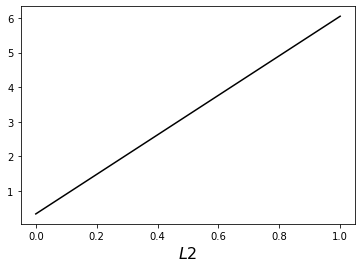

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn1_his[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

In [16]:
np.dot(l2_delta, syn1.T)* nonlin(l1,True)

array([[-8.47045603e-06, -1.37149442e-04],
       [-2.93822033e-06, -8.70598357e-05],
       [ 1.72930158e-06,  2.34600063e-05],
       [ 6.53334492e-06,  8.80758770e-05]])